# Campus Recruitment Analysis

**Dataset link:** https://www.kaggle.com/benroshan/factors-affecting-campus-placement/data

**Description:** What is in it?
This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

**Goal:** Rather than looking the model with the better performance for each task I want to experiment with different techniques.

**Suggested Questions:**

1. Which factor influenced a candidate in getting placed?
1. Does percentage matters for one to get placed?
1. Which degree specialization is much demanded by corporate?
1. Play with the data conducting all statistical tests.

**Proposed tasks:** 

1. Its possible to train a model capable of predict salary offered?
2. Create some candidates profiles by clsutering

In [1]:
import pandas as pd
import pandasql
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
#Look for categorical data in a given dataframe a substitute the columns with a 1Hot econding series of columns
#Note: The function will also encode the label column if it is given.
#Note: I should improve it to consider this escenario. checl .astype() for label column
def CatTo1Hot (df):
    cols = list(df.columns)
    dataTypeDict = dict(df.dtypes)
    new_cols = cols

    for col in cols:
        if dataTypeDict[col] == object:
            dummies = pd.get_dummies(df[[col]])
            i = new_cols.index(col) +1
            df = pd.concat([df[new_cols[:i]], dummies, df[new_cols[i:]]], axis = 1)
            df.drop(col, axis = 1, inplace = True)
            new_cols = list(df.columns)
    return df

#Look for categorical data in a given dataframe and substitute the unique values of each column with numbers
def Cat2Num (df):
    cols = df.columns
    dataTypeDict = dict(df.dtypes)

    for col in cols:
        if dataTypeDict[col] == object:
            labels = list(set(df[col]))
            encoder = preprocessing.LabelEncoder()
            encoder.fit(labels)
            df[[col]] = encoder.transform(df[col])
    return df


In [3]:
Data = pd.read_csv("Placement_Data_Full_Class.csv")
Data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


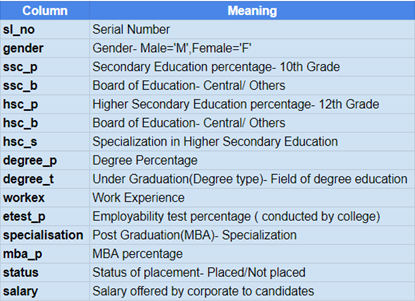

### 1. Which factor influenced a candidate in getting placed?


In order to use the decision tree model from sklearn, which can only proccess numerical data, the original dataset is encode and as there are some catergorical attributes with more than two unique values a 1-hot encode is used.

In [4]:
df_1 = Data.drop(['sl_no', 'salary'], axis = 1)
encoder = preprocessing.LabelEncoder()
encoder.fit([ 'Not Placed', 'Placed'])
aux = encoder.transform(df_1['status'])
df_1.drop('status', axis = 1, inplace = True)

df_1 = CatTo1Hot (df_1)
df_1['status'] = aux
df_1.head()

,gender_F,gender_M,ssc_p,ssc_b_Central,ssc_b_Others,hsc_p,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,...,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,etest_p,specialisation_Mkt&Fin,specialisation_Mkt&HR,mba_p,status
0,0,1,67.00,0,1,91.00,0,1,0,1,...,0,0,1,1,0,55.0,0,1,58.80,1
1,0,1,79.33,1,0,78.33,0,1,0,0,...,0,0,1,0,1,86.5,1,0,66.28,1
2,0,1,65.00,1,0,68.00,1,0,1,0,...,1,0,0,1,0,75.0,1,0,57.80,1
3,0,1,56.00,1,0,52.00,1,0,0,0,...,0,0,1,1,0,66.0,0,1,59.43,0
4,0,1,85.80,1,0,73.60,1,0,0,1,...,1,0,0,1,0,96.8,1,0,55.50,1


In [5]:
df_2 = Data.drop(['sl_no', 'salary'], axis = 1)
df_2 = Cat2Num(df_2)
df_2[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']] = df_2[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].values / 100
df_2.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,0.6700,1,0.9100,1,1,0.5800,2,0,0.550,1,0.5880,1
1,1,0.7933,0,0.7833,1,2,0.7748,2,1,0.865,0,0.6628,1
2,1,0.6500,0,0.6800,0,0,0.6400,0,0,0.750,0,0.5780,1
3,1,0.5600,0,0.5200,0,2,0.5200,2,0,0.660,1,0.5943,0
4,1,0.8580,0,0.7360,0,1,0.7330,0,0,0.968,0,0.5550,1


In [6]:
Status_corr = df_2.corr().status

The labels were separated from the dataset and split to get a train set and a test set, to fit the model and evaluate it

In [7]:
X = df_1.values

Y = X[:,21]
X = X[:,:21]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

placedTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)

placedTree.fit(X_train,Y_train)

predTree = placedTree.predict(X_test)
print ("Prediction: " + str(predTree [0:5]))
print ("Real: " + str(Y_test [0:5]))

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

print(classification_report(Y_test, predTree))

Prediction: [0. 1. 1. 0. 1.]
Real: [0. 1. 1. 0. 1.]
DecisionTrees's Accuracy:  0.7538461538461538
              precision    recall  f1-score   support

         0.0       0.59      0.53      0.56        19
         1.0       0.81      0.85      0.83        46

    accuracy                           0.75        65
   macro avg       0.70      0.69      0.69        65
weighted avg       0.75      0.75      0.75        65



The model achieved an accuracy of 76.92 % at predict the status of an student, as placed or not placed. The tree is shown below

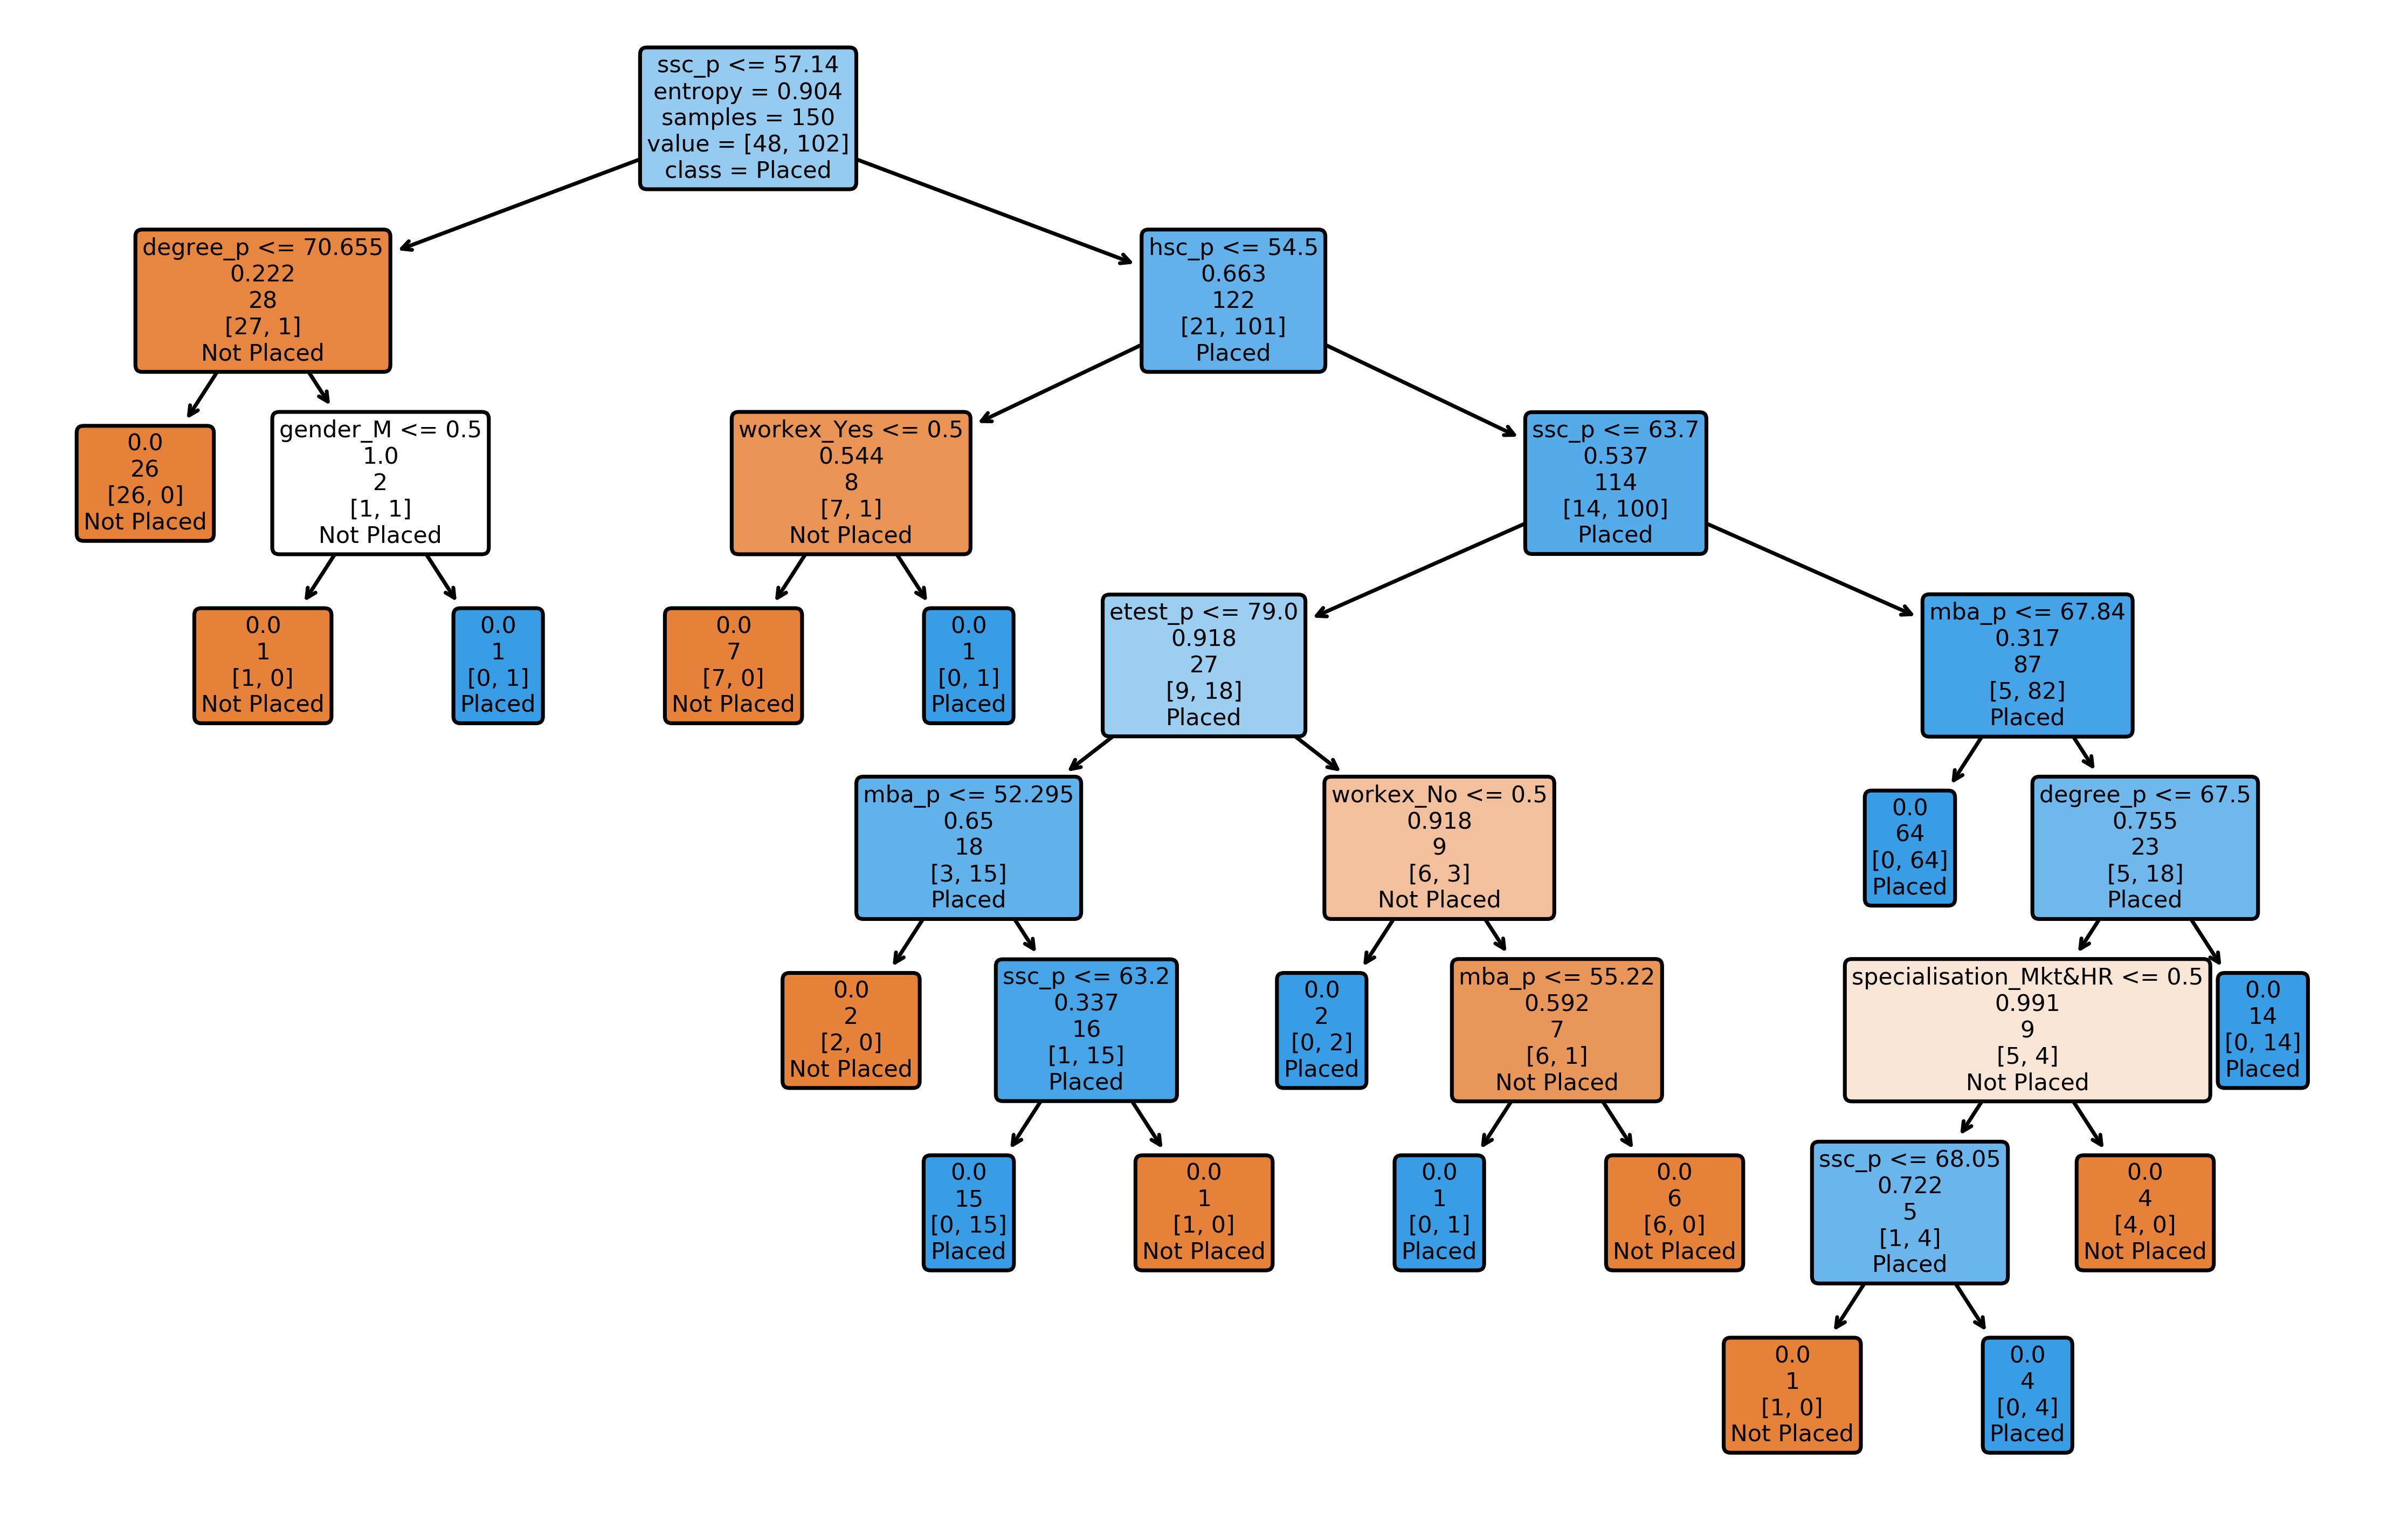

In [9]:
fn =list(df_1.columns)[:21]
cn=['Not Placed', 'Placed']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (11,7), dpi=512)
tree.plot_tree(placedTree,
               feature_names = fn, 
               class_names=cn,
               filled = True,
               label = 'root',
               rounded = True,
              fontsize = 6);
fig.savefig('PlacedTree.png')

Correlation coefficients with a threshold of +/- 0.25 was choose to select which features has some effect in the status of a student.

In [10]:
print(Status_corr[Status_corr > 0.25])
print(Status_corr[Status_corr < -0.25])

ssc_p       0.607889
hsc_p       0.491228
degree_p    0.479861
workex      0.276060
status      1.000000
Name: status, dtype: float64
specialisation   -0.250655
Name: status, dtype: float64


### Discussion 1
A decision trees were model in order to compare the attributes that they selected with the ones which had an absolute correletion coefficient bigger than 0.25, from both approaches it can be conclude that the main attributes with a bigger effect in a candidate getting placed are their:
* Secondary Education percentage - 10th Grade,
* Higher SE percentage - 12th Grade and
* Degree percentage

also, but with smaller effect:
* Work experience
* Post graduation (MBA) - Specialization

> 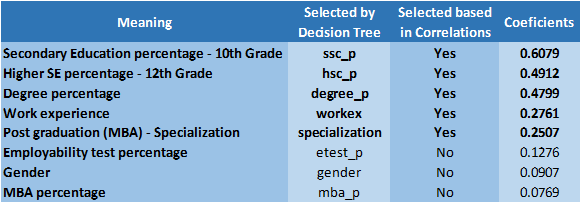

This could indicate that after getting a degree it becomes more important the thema in which you specialize than how was your performance through the specialization.

Also, instead of being placed for their higher percentage of Secondary Education to Degree, it could be for other attributes such as their commitment, dedication, effort, etc. and that the high percentages are a consequence of these other attributes

### 2. Does percentage matters for one to get placed?
### Discussion 2
The percentage obtained fom Secondary Education to Degree have a big influence on whether a candidate is placed, ranther than fields of study or specialization, but after the Degree, the MBA and employability test percentages lose importance and it becomes better to have work experience and which post graduation specialization you have. 

### 3. Which degree specialization is much demanded by corporate?


In [11]:
Specialization = Data[['degree_t', 'status', 'sl_no']]
Specialization.columns = ['Degree Specialization', 'Status', 'Number']
Specialization = Specialization.groupby(['Degree Specialization', 'Status'], axis = 0).count().sort_values('Number')
Specialization

Number
Degree Specialization Status            
Others                Placed           5
                      Not Placed       6
Sci&Tech              Not Placed      18
                      Placed          41
Comm&Mgmt             Not Placed      43
                      Placed         102

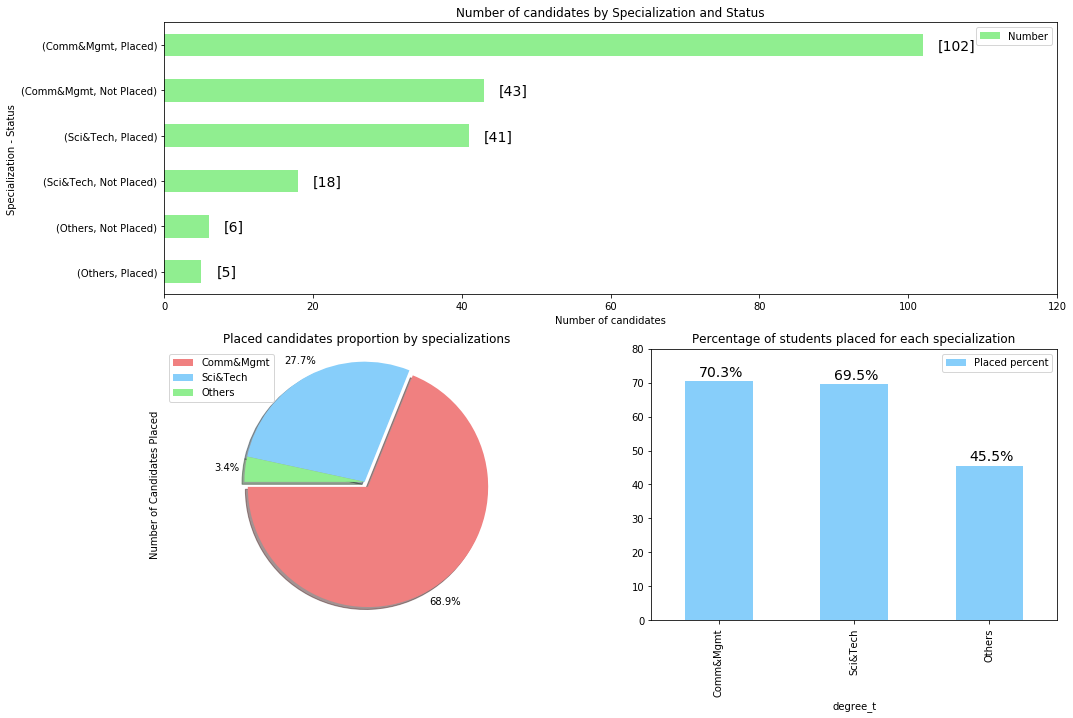

In [12]:
fig = plt.figure(figsize = (16,11))

#Plot 1: Barh Chart "Number of candidates by Specialization and Status"
ax1 = fig.add_subplot(2,1,1)
Specialization[['Number']].plot(kind = 'barh',
                                xlim = (0,120),
                                color = 'lightgreen',
                                ax = ax1
                                )
ax1.set_title("Number of candidates by Specialization and Status")
ax1.set_xlabel('Number of candidates')
ax1.set_ylabel('Specialization - Status')

values = list(Specialization.values)
for i, val in enumerate(values):
    ax1.text(s = str(val), 
             x = int(val) + 2,
             y = i -0.11,
             fontsize = 14)

#Plot 2: Pie Chart "Placed candidates proportion by specializations"
Placed_cand = Data[['degree_t', 'sl_no']].loc[Data['status'] == "Placed"].groupby('degree_t', axis = 0).count()
Placed_cand.columns = ["Number of Candidates Placed"]
Placed_cand.sort_values('Number of Candidates Placed', ascending = False, axis = 0, inplace = True)


colors_list = ['lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.05, 0.0, 0.0]

ax2 = fig.add_subplot(2,2,3)
Placed_cand['Number of Candidates Placed'].plot(kind = 'pie',
              autopct = '%1.1f%%',
              startangle = 180,
              shadow = True,
              labels = None,
              pctdistance = 1.15,
              colors = colors_list,
              explode = explode_list,
              ax = ax2
              )
ax2.set_title("Placed candidates proportion by specializations")
ax2.axis('equal')
ax2.legend(labels = Placed_cand.index, loc = 'upper left')

#Plot 3: Bar Chart "Placed candidates percent for specializations"
Percents = Data[['degree_t', 'sl_no']].groupby('degree_t', axis = 0).count()
Percents.sort_values('sl_no', ascending = False, axis = 0, inplace = True)
Percents = pd.DataFrame(Placed_cand.values / Percents.values) * 100
Percents['degree_t'] = Placed_cand.index
Percents.set_index('degree_t', inplace = True)
Percents.columns = ['Placed percent']


ax3 = fig.add_subplot(2,2,4)
Percents.plot(kind = 'bar',
              color = 'lightskyblue',
              ax = ax3,
              ylim = (0,80)
              )
ax3.set_title("Percentage of students placed for each specialization")

values = list(np.round(Percents.values,1))
for i, val in enumerate(values):
    ax3.text(s = str(val)[1:5] + "%" , 
             y = int(val) + 2,
             x = i - 0.15,
             fontsize = 14)


plt.show()
#pie porcentajes placed/ spec
#pie 


### Discussion 3
As seen on the upper horizontal bar plot, the Commerce & Management specialization has the bigger demand of students by corporations with the 68.9% of the placed students, but also has the biggest number of not placed students. Then the Science & Technology specialization with the 27.7% and at last the others with the 3.4%.

But as the proportion of students by specialization are unbalanced, the previous results are biased. On the buttom right bar plot we can look the percentages of placed students for each specialization, where it is easy to observe that both, Commerce & Management and Science & Technology, have almost the same percentage of placed students, around 70.0%.

We can conclude from this that both specializations are practically equally demanded by corporates but the campus has a bigger demand of students who have studied a Commerce & Management degree specialization.

### 4. Its possible to train a model capable of predict salary offered?

In order to implement a neural network to predict tha salary of the students, the data was 1-hot encoded and normalize.

In [13]:
df_NN = Data.drop(['sl_no', 'status'], axis = 1)
aux = df_NN['salary']
df_NN.drop('salary', axis = 1, inplace = True)

df_NN = CatTo1Hot (df_NN)
df_NN['salary'] = aux
#df_NN['salary'].replace(np.nan, int(df_NN['salary'].mean()), inplace = True)
df_NN.drop(df_NN['salary'][df_NN['salary'] == np.nan], axis = 0, inplace = True)
mean_df = df_NN['salary'].mean()
std_df = df_NN['salary'].std()
a = abs((df_NN['salary'] - mean_df) / std_df) < 2
df_NN = df_NN.loc[a]
df_NN.drop(['workex_Yes','workex_No', 'degree_t_Others'], axis = 1, inplace =True)
df_NN[['ssc_p', 'hsc_p', 'mba_p', 'etest_p', 'degree_p']] = df_NN[['ssc_p', 'hsc_p', 'mba_p', 'etest_p', 'degree_p']] / 100
df_NN['salary'] = df_NN['salary'] / 1000000
df_NN.head()

,gender_F,gender_M,ssc_p,ssc_b_Central,ssc_b_Others,hsc_p,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_p,degree_t_Comm&Mgmt,degree_t_Sci&Tech,etest_p,specialisation_Mkt&Fin,specialisation_Mkt&HR,mba_p,salary
0,0,1,0.6700,0,1,0.9100,0,1,0,1,0,0.5800,0,1,0.550,0,1,0.5880,0.270
1,0,1,0.7933,1,0,0.7833,0,1,0,0,1,0.7748,0,1,0.865,1,0,0.6628,0.200
2,0,1,0.6500,1,0,0.6800,1,0,1,0,0,0.6400,1,0,0.750,1,0,0.5780,0.250
4,0,1,0.8580,1,0,0.7360,1,0,0,1,0,0.7330,1,0,0.968,1,0,0.5550,0.425
7,0,1,0.8200,1,0,0.6400,1,0,0,0,1,0.6600,0,1,0.670,1,0,0.6214,0.252


The data present a significant smaller correlation with the salary than with the status of the students.

In [14]:
df_NN.corr()[['salary']].sort_values('salary')

,salary
gender_F,-0.198779
degree_t_Comm&Mgmt,-0.171509
hsc_s_Arts,-0.100611
ssc_b_Central,-0.097908
hsc_b_Central,-0.056550
specialisation_Mkt&HR,-0.055738
hsc_s_Commerce,0.000028
hsc_s_Science,0.041042
specialisation_Mkt&Fin,0.055738
hsc_b_Others,0.056550


Which ends in poor model because there isn´t enough information on the data that the neural network could learn to correctly predict the salary.

In [21]:
X = df_NN.drop('salary', axis = 1).values
Y = df_NN[['salary']].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(units = 1024, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)  ))
    model.add(Dense(units = 1024, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)  ))
    model.add(Dense(units = 1024, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)  ))
    model.add(Dropout(0.5))

    model.add(Dense(units = 1, activation = 'linear' ))
    
    
    checkpoint_name = 'Best-Weights.hdf5' 
    checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
    callbacks_list = [checkpoint]

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'mean_absolute_error', 
                  metrics = ['mean_absolute_error', 'CategoricalAccuracy'] )


    history = model.fit(x_train, y_train, batch_size = 99, epochs = 15000, verbose = 0, validation_data= (x_test, y_test), callbacks=callbacks_list)

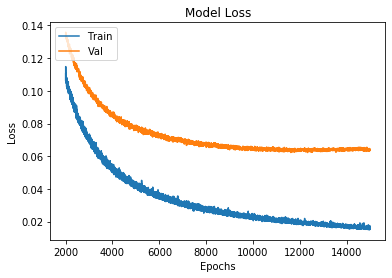

Best epoch: 12334
Best loss: 0.06226397305727005
R2-score: -1.42


In [20]:
wights_file = 'Best-Weights.hdf5'  # choose the best checkpoint 
model.load_weights(wights_file) # load it
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

plt.plot(range(2000,15000), history.history['loss'][2000:])
plt.plot(range(2000,15000), history.history['val_loss'][2000:])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

test_y_hat = model.predict(x_test)

print("Best epoch: " + str(np.argmin(history.history['val_loss'])))
print("Best loss: " + str(min(history.history['val_loss'])))
print("R2-score: %.2f" % metrics.r2_score(test_y_hat , y_test) )

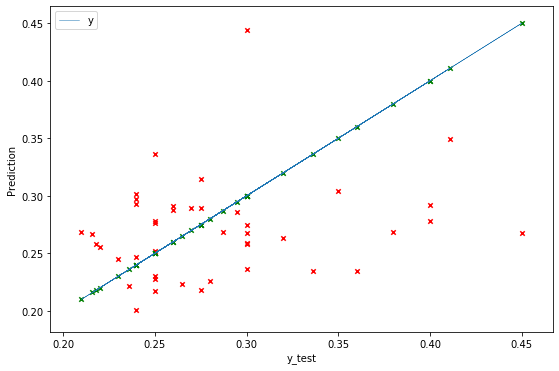

In [22]:
fig = plt.figure(figsize=(9, 6))

a= pd.DataFrame(y_test)
a['predict'] = test_y_hat
a.columns = ['y_test', 'prediction']
a['y'] = a['y_test']

ax0 = fig.add_subplot(1, 1, 1)
a.plot(kind = 'scatter',
       x = 'y_test', 
       y = 'prediction',
       marker = 'x',
       color = 'red',
       ax = ax0
      )

a.plot(kind = 'scatter',
       x = 'y_test', 
       y = 'y',
       marker = 'x',
       color = 'green',
       ax = ax0
      )

a.plot(kind = 'line',
       x = 'y_test', 
       y = 'y',
       ax = ax0,
       linewidth = 0.5
      )


ax0.set_xlabel('y_test')
ax0.set_ylabel('Prediction')

plt.show()


### Discussion 4

The dataset contains too few rows of information and a weak correlation between features and salary, making it impossible to implement a good model that can predict this last feature.

### 5. Create some candidates profiles by clsutering

The percentages from Secondary Education to MBA were substitute with an average of the four percentages and the categorical data with more than three values were 1-Hot enconded.

In [17]:
X = Data.drop('sl_no', axis = 1)
X['salary'].replace(np.nan, int(X['salary'].mean()), inplace = True)
X = Cat2Num(X)
X['avg'] = (X['ssc_p'] +  X['hsc_p'] + X['degree_p'] + X['mba_p']) / 4
X.drop(['degree_t', 'specialisation', 'hsc_s', 'ssc_p', 'hsc_p', 'mba_p', 'degree_p'], axis = 1, inplace = True)
X = pd.concat([X, CatTo1Hot(Data[['degree_t', 'specialisation', 'hsc_s']])], axis = 1)
grades = X[['etest_p', 'avg']]
X[['etest_p', 'avg']] = (grades - np.min(grades.values,0)) / (np.max(grades.values,0) - np.min(grades.values,0)) #/ 100
Sal_min = min(X['salary'])
Sal_max = max(X['salary'])
X['salary'] = (X['salary'] - Sal_min) / (Sal_max -Sal_min)  
X.head()

,gender,ssc_b,hsc_b,workex,etest_p,status,salary,avg,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science
0,1,1,1,0,0.104167,1,0.094595,0.597332,0,0,1,0,1,0,1,0
1,1,0,1,1,0.760417,1,0.000000,0.796867,0,0,1,1,0,0,0,1
2,1,0,0,0,0.520833,1,0.067568,0.447418,1,0,0,1,0,1,0,0
3,1,0,0,0,0.333333,0,0.119804,0.182295,0,0,1,0,1,0,0,1
4,1,0,0,0,0.975000,1,0.304054,0.697774,1,0,0,1,0,0,1,0


A K=4 was use to cluster the data and compute the average value for those attributes that apport some information of the cluster´s characteristics

In [19]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_ 

aux = X.drop(['specialisation_Mkt&Fin', 'specialisation_Mkt&HR'], axis = 1).copy()
aux['salary'] = (aux['salary'] * (Sal_max -Sal_min)) + Sal_min
aux['specialisation'] = df_2['specialisation']
aux['Cluster_no'] = k_means.labels_
groups = aux.groupby('Cluster_no').mean()
groups['size'] = aux[['Cluster_no','salary']].groupby('Cluster_no', axis = 0).count().values
groups[['size', 'hsc_s_Arts', 'hsc_s_Commerce', 'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'degree_t_Comm&Mgmt', 'specialisation', 'avg', 'status', 'salary']]

,size,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,degree_t_Comm&Mgmt,specialisation,avg,status,salary
Cluster_no,,,,,,,,,,,
0,40,0.025000,0.000000,0.975000,0.075000,0.725000,0.200000,0.0,0.545289,0.850000,305448.250000
1,80,0.087500,0.875000,0.037500,0.012500,0.012500,0.975000,0.0,0.549753,0.762500,292368.062500
2,44,0.022727,0.977273,0.000000,0.022727,0.045455,0.931818,1.0,0.422103,0.568182,272896.477273
3,51,0.039216,0.000000,0.960784,0.117647,0.529412,0.352941,1.0,0.468491,0.549020,283256.176471


### Discussion 5

A K-Means clustering was run over the dataset to find four groups of students and get a profile for each of those groups. 

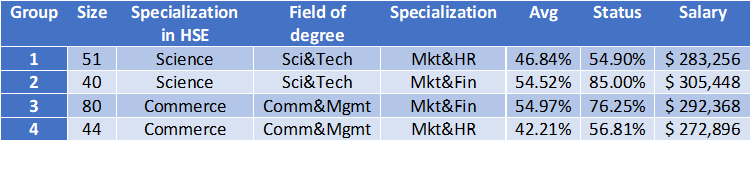

***Group 1:*** Those who have a scientific background and took the Marketing & HR specialization during the MBA, they conform the 23.72% of the students.

***Group 2:*** Those who have a scientific background and took the Marketing & Finance specialization during the MBA, they conform the 18.35% of the students.

***Group 3:*** Those who have a background in commerce and took the Marketing & HR specialization during the MBA, they conform the 36.70% of the students.

***Group 4:*** Those who have a background in commerce and took the Marketing & Finance specialization during the MBA, they conform the 20.18 % of the students.

Those groups who have a scientific background (1 & 2) over the ones in commerce (3 & 4) tend to have a better average percentage from high school to MBA,
being placed percentage and average salary, the same happens for those groups who have taken on their MBA studies a specialization on Marketing & Finance (2 & 3) 
over Marketing & HR (1 & 4).
